In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
!pip install collections  # Install the collections package
from collections import Counter
import glob2 as gb
import matplotlib.pyplot as plt
import seaborn as sns
import glob2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
!pip install tensorflow-data-validation
import tensorflow_data_validation as tfdv
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow_data_validation import *


ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 67.1 MB/s eta 0:0

<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.IpcWriteOptions size changed, may indicate binary incompatibility. Expected 72 from C header, got 88 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: pyarrow.lib.IpcReadOptions size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "drive/"

In [ ]:
names = [name.replace(' ', '_').split('_')[0] for name in os.listdir(path)]
classes = Counter(names)


In [ ]:
tpath ='/content/drive/MyDrive/New folder (2)/test'

In [ ]:
main_directory = tpath
class_names = sorted(os.listdir(main_directory))
n_classes = len(class_names)
print(n_classes)

53


In [ ]:
class_names

['ace of clubs',
 'ace of diamonds',
 'ace of hearts',
 'ace of spades',
 'eight of clubs',
 'eight of diamonds',
 'eight of hearts',
 'eight of spades',
 'five of clubs',
 'five of diamonds',
 'five of hearts',
 'five of spades',
 'four of clubs',
 'four of diamonds',
 'four of hearts',
 'four of spades',
 'jack of clubs',
 'jack of diamonds',
 'jack of hearts',
 'jack of spades',
 'joker',
 'king of clubs',
 'king of diamonds',
 'king of hearts',
 'king of spades',
 'nine of clubs',
 'nine of diamonds',
 'nine of hearts',
 'nine of spades',
 'queen of clubs',
 'queen of diamonds',
 'queen of hearts',
 'queen of spades',
 'seven of clubs',
 'seven of diamonds',
 'seven of hearts',
 'seven of spades',
 'six of clubs',
 'six of diamonds',
 'six of hearts',
 'six of spades',
 'ten of clubs',
 'ten of diamonds',
 'ten of hearts',
 'ten of spades',
 'three of clubs',
 'three of diamonds',
 'three of hearts',
 'three of spades',
 'two of clubs',
 'two of diamonds',
 'two of hearts',
 'two o

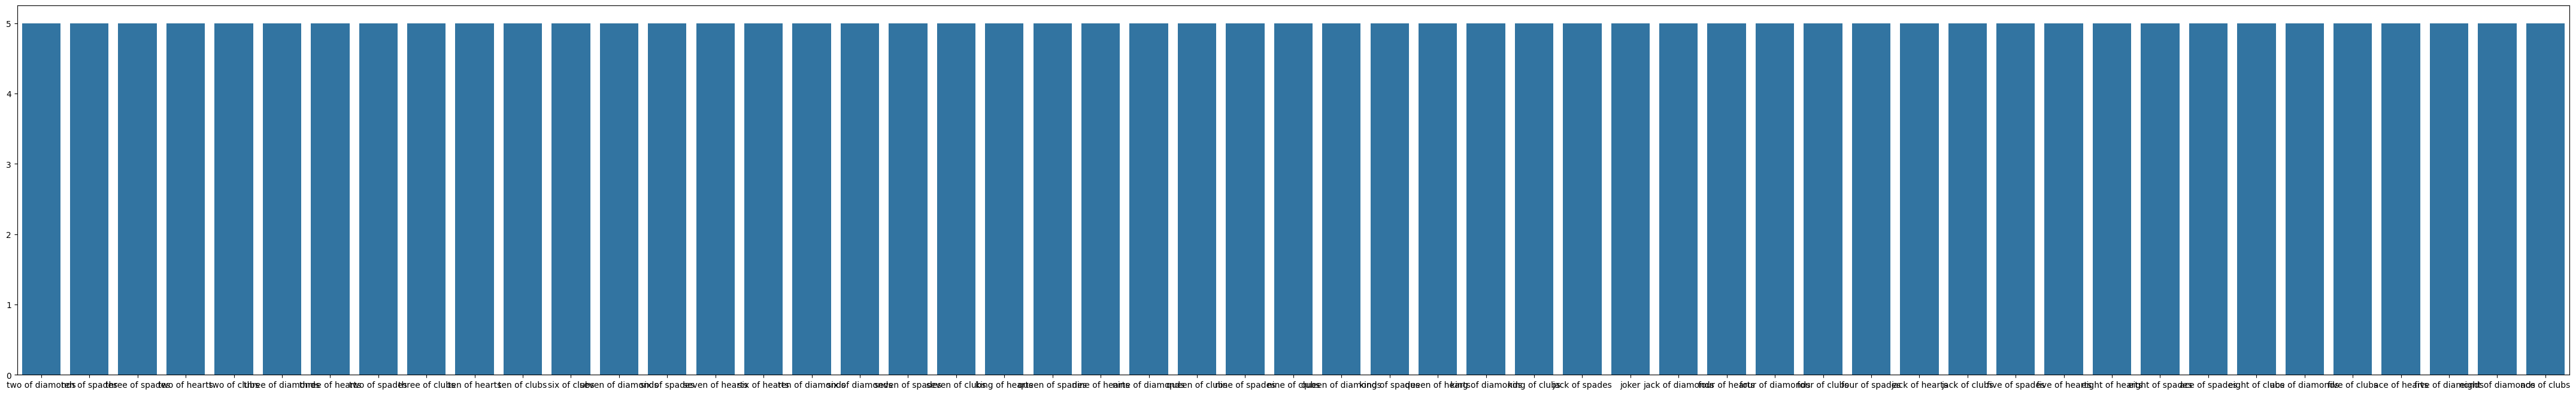

In [ ]:
class_names = []
class_count = []
train_examples = 0
for f in os.listdir(tpath):
  files = gb.glob(pathname=str(tpath + "//" + f + "/*"))
  class_names.append(f)
  class_count.append(len(files))
  train_examples += len(files)
plt.figure(figsize=(55,8))
sns.barplot(x=class_names, y=class_count)
plt.show()

Found 265 images belonging to 53 classes.


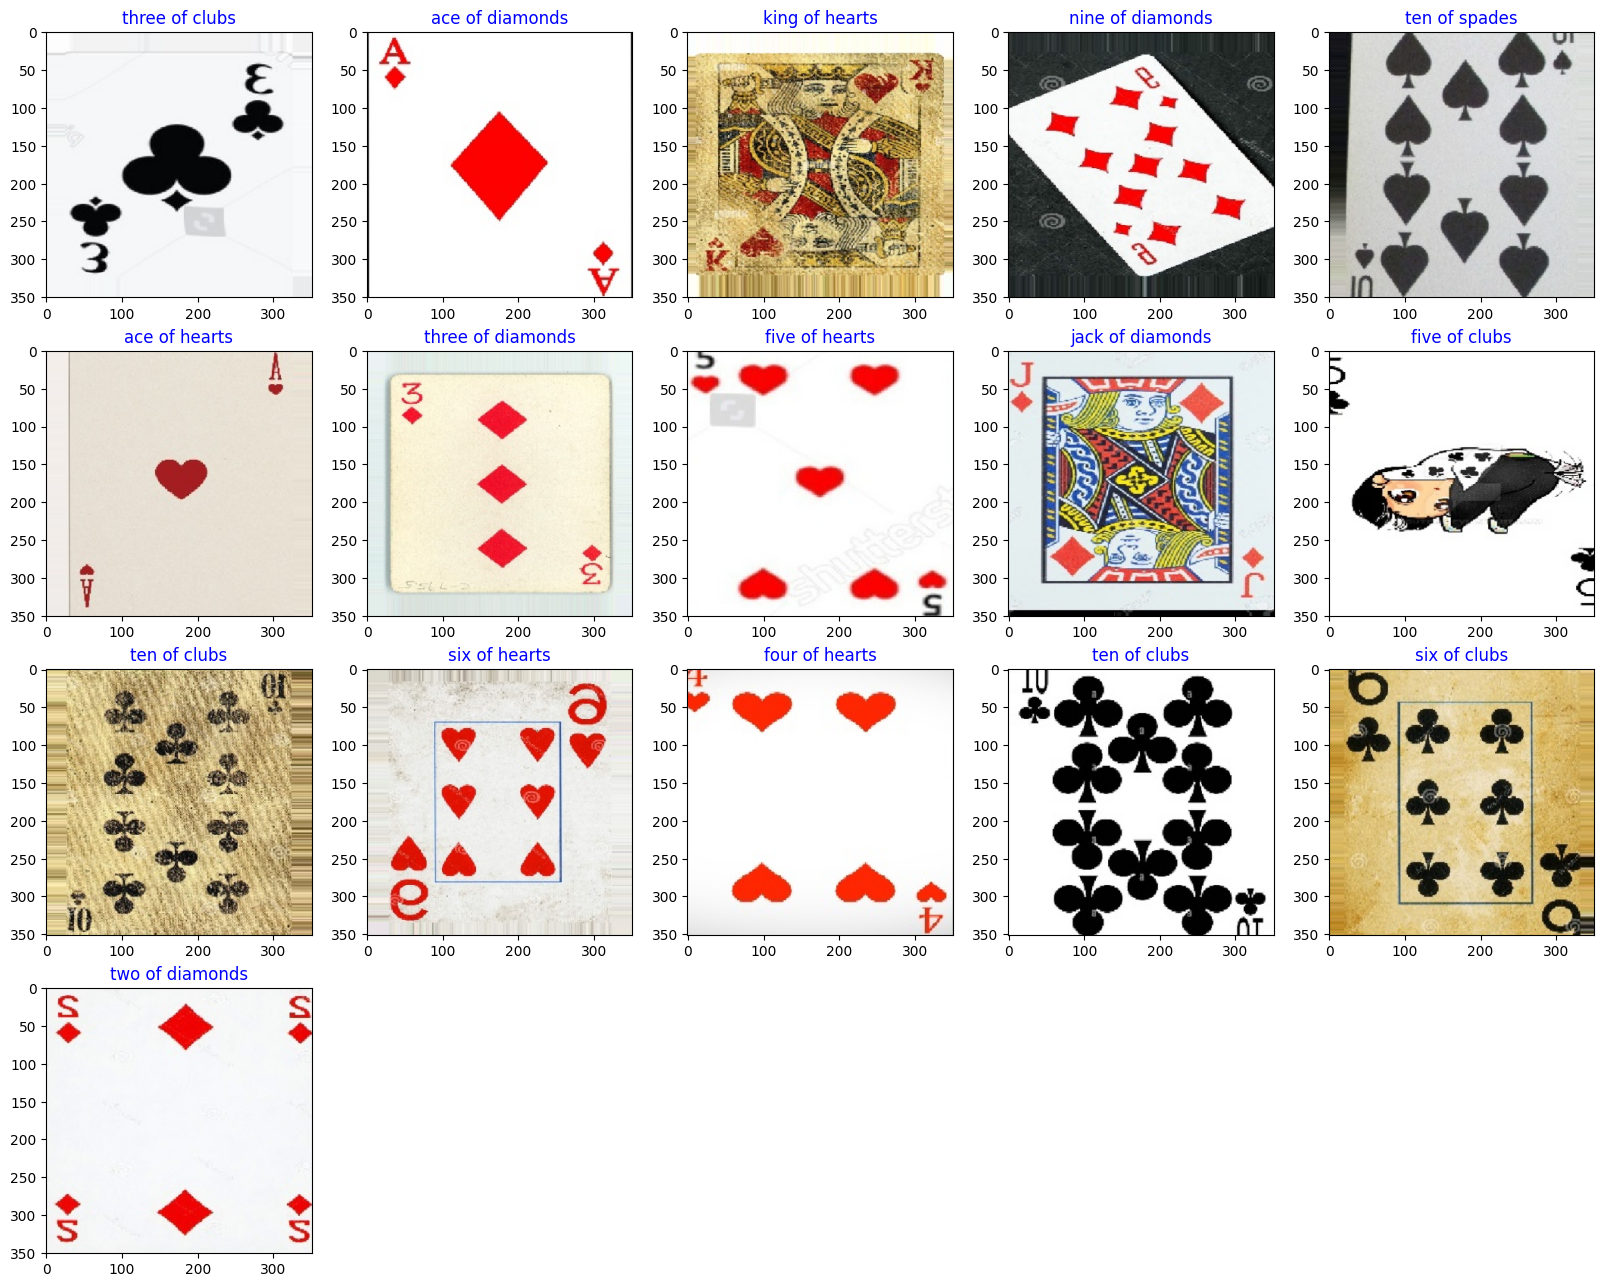

In [ ]:
import numpy as np
train_gen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
 )
train_batch = train_gen.flow_from_directory(
    directory=tpath,
    target_size=(351,351),
    batch_size=16,
 )
g_dict = train_batch.class_indices
classes = list(g_dict.keys())
images, labels = next(train_batch)


length = len(labels)
sample = min(length,30)

plt.figure(figsize= (20, 20))

image = None
for i in range(sample):
  plt.subplot(5, 5, i + 1)
  image = images[i]
  plt.imshow(image)
  index = np.argmax(labels[i])
  class_name = classes[index]
  plt.title(class_name,color='blue',fontsize=12)
  plt.axis
plt.show()





In [ ]:
#!pip install tensorflow-data-validation
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    tpath,
    batch_size = 4,
    image_size =(500,500),

    shuffle = True,
    seed =123,
    validation_split =0.01,
    subset ='training'

)
vpath ='/content/drive/MyDrive/New folder (2)/test'
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=vpath,
    labels="inferred",
    batch_size = 4,
    image_size =(500,500),

    shuffle = True,
    seed =123,
    validation_split=0.01,
    subset ='validation'


)





Found 265 files belonging to 53 classes.
Using 263 files for training.
Found 265 files belonging to 53 classes.
Using 2 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define class_names if not defined elsewhere
class_names = [class_names]  # Define your class names

train_gen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

tpath ='/content/drive/MyDrive/New folder (2)/test'

train_batch = train_gen.flow_from_directory(
    directory=tpath,
    target_size=(500, 500),
    batch_size=16,
    class_mode='categorical'  # Ensure one-hot encoding of labels
)

# Define the model
resnet_model = Sequential()

# Load pre-trained ResNet50 model
Pretrained_model = ResNet50(
    include_top=False,
    input_shape=(500, 500, 3),
    pooling='avg',
    weights='imagenet'
)

# Freeze layers except the last few
for layer in Pretrained_model.layers[:-4]:
    layer.trainable = False

# Add layers to the model
resnet_model.add(Pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(256, activation='relu'))  # Adjust the number of units here
resnet_model.add(Dropout(0.2))
resnet_model.add(Dense(len(class_names), activation='softmax'))  # Number of units matches the number of classes
resnet_model.add(Dense(53, activation='softmax'))
epochs = 10

# Compile the model
resnet_model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
resnet_model.fit(
    train_batch,
    epochs=epochs,
    verbose=1
)


Found 265 images belonging to 53 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
17/17 [==============================] - 111s 6s/step - loss: 3.9902 - accuracy: 0.0189
Epoch 2/10
17/17 [==============================] - 17s 1s/step - loss: 3.9883 - accuracy: 0.0189
Epoch 3/10
17/17 [==============================] - 20s 1s/step - loss: 3.9875 - accuracy: 0.0189
Epoch 4/10
17/17 [==============================] - 18s 1s/step - loss: 3.9871 - accuracy: 0.0189
Epoch 5/10
17/17 [==============================] - 17s 1s/step - loss: 3.9863 - accuracy: 0.0189
Epoch 6/10
17/17 [==============================] - 19s 1s/step - loss: 3.9858 - accuracy: 0.0189
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 3.9853 - accuracy: 0.0189
Epoch 8/10
17/17 [==============================] - 17s 1s/step - loss: 3.9849 - accuracy: 0.0189
Epoch 9/10
17/17 [==============================] - 19s 1s/step - loss: 3.9843 - accuracy: 0.0189
Epoch 10/1

In [ ]:
# Assuming TensorFlow is already installed using pip
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Load your model (Make sure the path to your model is correct)
resnet_model = load_model('/content/drive/MyDrive/New folder (2)/53cards-53-(200 X 200)-100.00.h5')

# Corrected the path for load_img and ensured it matches your file system
img_path = '/content/card.jpg'
img = load_img(img_path, target_size=(500, 500))  # First, load the image with the target size
img = img_to_array(img)  # Convert the image to an array
img = np.expand_dims(img, axis=0)  # Add a batch dimension
img = tf.image.resize(img, (200, 200))  # Resize the image to match the model's expected input size
img = img / 255.0  # Normalize the image if your model expects inputs in the range [0, 1]

# Make a prediction
y_pred = resnet_model.predict(img)
class_idx = np.argmax(y_pred, axis=1)[0]

# Define the class names list
class_names = [
    'Ace of Clubs', 'Ace of Diamonds', 'Ace of Hearts', 'Ace of Spades',
    'Eight of Clubs', 'Eight of Diamonds', 'Eight of Hearts', 'Eight of Spades',
    'Five of Clubs', 'Five of Diamonds', 'Five of Hearts', 'Five of Spades',
    'Four of Clubs', 'Four of Diamonds', 'Four of Hearts', 'Four of Spades',
    'Jack of Clubs', 'Jack of Diamonds', 'Jack of Hearts', 'Jack of Spades',
    'Joker',  # Assuming 'joker' is corrected to 'Joker' for consistency
    'King of Clubs', 'King of Diamonds', 'King of Hearts', 'King of Spades',
    'Nine of Clubs', 'Nine of Diamonds', 'Nine of Hearts', 'Nine of Spades',
    'Queen of Clubs', 'Queen of Diamonds', 'Queen of Hearts', 'Queen of Spades',
    'Seven of Clubs', 'Seven of Diamonds', 'Seven of Hearts', 'Seven of Spades',
    'Six of Clubs', 'Six of Diamonds', 'Six of Hearts', 'Six of Spades',
    'Ten of Clubs', 'Ten of Diamonds', 'Ten of Hearts', 'Ten of Spades',
    'Three of Clubs', 'Three of Diamonds', 'Three of Hearts', 'Three of Spades',
    'Two of Clubs', 'Two of Diamonds', 'Two of Hearts', 'Two of Spades'
]

class_name = class_names[class_idx] if class_idx < len(class_names) else "Unknown"
print('Predicted class name:', class_name)


1/1 [==============================] - 4s 4s/step
Predicted class name: Ten of Diamonds


In [ ]:
!pip install tensorflow

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Assuming you've already loaded your model somewhere before this
# resnet_model = load_model('path_to_your_model.h5')

# Corrected the path for load_img and removed unnecessary spaces in the path
img_path = '/content/images.jpg'
img = load_img(img_path, target_size=(500, 500))
# Resize the input image to match the expected shape
img = tf.image.resize(img, (200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make a prediction
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred, axis=1)[0]

# Define the class names list
class_names = [
    'Ace of Clubs', 'Ace of Diamonds', 'Ace of Hearts', 'Ace of Spades',
    'Eight of Clubs', 'Eight of Diamonds', 'Eight of Hearts', 'Eight of Spades',
    'Five of Clubs', 'Five of Diamonds', 'Five of Hearts', 'Five of Spades',
    'Four of Clubs', 'Four of Diamonds', 'Four of Hearts', 'Four of Spades',
    'Jack of Clubs', 'Jack of Diamonds', 'Jack of Hearts', 'Jack of Spades',
    'joker',  # Correctly added comma here
    'King of Clubs', 'King of Diamonds', 'King of Hearts', 'King of Spades',
    'Nine of Clubs', 'Nine of Diamonds', 'Nine of Hearts', 'Nine of Spades',
    'Queen of Clubs', 'Queen of Diamonds', 'Queen of Hearts', 'Queen of Spades',
    'Seven of Clubs', 'Seven of Diamonds', 'Seven of Hearts', 'Seven of Spades',
    'Six of Clubs', 'Six of Diamonds', 'Six of Hearts', 'Six of Spades',
    'Ten of Clubs', 'Ten of Diamonds', 'Ten of Hearts', 'Ten of Spades',
    'Three of Clubs', 'Three of Diamonds', 'Three of Hearts', 'Three of Spades',
    'Two of Clubs', 'Two of Diamonds', 'Two of Hearts', 'Two of Spades'
]

class_name = class_names[class_idx] if class_idx < len(class_names) else "Unknown"
print('Predicted class name:', class_name)

In [ ]:
!pip install tensorflow

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Assuming you've already loaded your model somewhere before this
# resnet_model = load_model('path_to_your_model.h5')

# Corrected the path for load_img and removed unnecessary spaces in the path
img_path = '/content/joker.jpg'
img = load_img(img_path, target_size=(500, 500))
# Resize the input image to match the expected shape
img = tf.image.resize(img, (224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make a prediction
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred, axis=1)[0]

# Define the class names list
class_names = [
    'Ace of Clubs', 'Ace of Diamonds', 'Ace of Hearts', 'Ace of Spades',
    'Eight of Clubs', 'Eight of Diamonds', 'Eight of Hearts', 'Eight of Spades',
    'Five of Clubs', 'Five of Diamonds', 'Five of Hearts', 'Five of Spades',
    'Four of Clubs', 'Four of Diamonds', 'Four of Hearts', 'Four of Spades',
    'Jack of Clubs', 'Jack of Diamonds', 'Jack of Hearts', 'Jack of Spades',
    'joker',  # Correctly added comma here
    'King of Clubs', 'King of Diamonds', 'King of Hearts', 'King of Spades',
    'Nine of Clubs', 'Nine of Diamonds', 'Nine of Hearts', 'Nine of Spades',
    'Queen of Clubs', 'Queen of Diamonds', 'Queen of Hearts', 'Queen of Spades',
    'Seven of Clubs', 'Seven of Diamonds', 'Seven of Hearts', 'Seven of Spades',
    'Six of Clubs', 'Six of Diamonds', 'Six of Hearts', 'Six of Spades',
    'Ten of Clubs', 'Ten of Diamonds', 'Ten of Hearts', 'Ten of Spades',
    'Three of Clubs', 'Three of Diamonds', 'Three of Hearts', 'Three of Spades',
    'Two of Clubs', 'Two of Diamonds', 'Two of Hearts', 'Two of Spades'
]

class_name = class_names[class_idx] if class_idx < len(class_names) else "Unknown"
print('Predicted class name:', class_name)


In [ ]:
!pip install tensorflow

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Assuming you've already loaded your model somewhere before this
# resnet_model = load_model('path_to_your_model.h5')

# Corrected the path for load_img and removed unnecessary spaces in the path
img_path = '/content/jack of clubs.jpg'
img = load_img(img_path, target_size=(500, 500))
# Resize the input image to match the expected shape
img = tf.image.resize(img, (224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make a prediction
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred, axis=1)[0]

# Define the class names list
class_names = [
    'Ace of Clubs', 'Ace of Diamonds', 'Ace of Hearts', 'Ace of Spades',
    'Eight of Clubs', 'Eight of Diamonds', 'Eight of Hearts', 'Eight of Spades',
    'Five of Clubs', 'Five of Diamonds', 'Five of Hearts', 'Five of Spades',
    'Four of Clubs', 'Four of Diamonds', 'Four of Hearts', 'Four of Spades',
    'Jack of Clubs', 'Jack of Diamonds', 'Jack of Hearts', 'Jack of Spades',
    'joker',  # Correctly added comma here
    'King of Clubs', 'King of Diamonds', 'King of Hearts', 'King of Spades',
    'Nine of Clubs', 'Nine of Diamonds', 'Nine of Hearts', 'Nine of Spades',
    'Queen of Clubs', 'Queen of Diamonds', 'Queen of Hearts', 'Queen of Spades',
    'Seven of Clubs', 'Seven of Diamonds', 'Seven of Hearts', 'Seven of Spades',
    'Six of Clubs', 'Six of Diamonds', 'Six of Hearts', 'Six of Spades',
    'Ten of Clubs', 'Ten of Diamonds', 'Ten of Hearts', 'Ten of Spades',
    'Three of Clubs', 'Three of Diamonds', 'Three of Hearts', 'Three of Spades',
    'Two of Clubs', 'Two of Diamonds', 'Two of Hearts', 'Two of Spades'
]

class_name = class_names[class_idx] if class_idx < len(class_names) else "Unknown"
print('Predicted class name:', class_name)


In [ ]:
!pip install tensorflow

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Assuming you've already loaded your model somewhere before this
# resnet_model = load_model('path_to_your_model.h5')

# Corrected the path for load_img and removed unnecessary spaces in the path
img_path = '/content/four of clubs.jpg'
img = load_img(img_path, target_size=(500, 500))
# Resize the input image to match the expected shape
img = tf.image.resize(img, (224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make a prediction
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred, axis=1)[0]

# Define the class names list
class_names = [
    'Ace of Clubs', 'Ace of Diamonds', 'Ace of Hearts', 'Ace of Spades',
    'Eight of Clubs', 'Eight of Diamonds', 'Eight of Hearts', 'Eight of Spades',
    'Five of Clubs', 'Five of Diamonds', 'Five of Hearts', 'Five of Spades',
    'Four of Clubs', 'Four of Diamonds', 'Four of Hearts', 'Four of Spades',
    'Jack of Clubs', 'Jack of Diamonds', 'Jack of Hearts', 'Jack of Spades',
    'joker',  # Correctly added comma here
    'King of Clubs', 'King of Diamonds', 'King of Hearts', 'King of Spades',
    'Nine of Clubs', 'Nine of Diamonds', 'Nine of Hearts', 'Nine of Spades',
    'Queen of Clubs', 'Queen of Diamonds', 'Queen of Hearts', 'Queen of Spades',
    'Seven of Clubs', 'Seven of Diamonds', 'Seven of Hearts', 'Seven of Spades',
    'Six of Clubs', 'Six of Diamonds', 'Six of Hearts', 'Six of Spades',
    'Ten of Clubs', 'Ten of Diamonds', 'Ten of Hearts', 'Ten of Spades',
    'Three of Clubs', 'Three of Diamonds', 'Three of Hearts', 'Three of Spades',
    'Two of Clubs', 'Two of Diamonds', 'Two of Hearts', 'Two of Spades'
]

class_name = class_names[class_idx] if class_idx < len(class_names) else "four of clubs"
print('Predicted class name:', class_name)


In [ ]:
!pip install tensorflow

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Assuming you've already loaded your model somewhere before this
# resnet_model = load_model('path_to_your_model.h5')

# Corrected the path for load_img and removed unnecessary spaces in the path
img_path = '/content/king of heart'
img = load_img(img_path, target_size=(500, 500))
# Resize the input image to match the expected shape
img = tf.image.resize(img, (224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make a prediction
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred, axis=1)[0]

# Define the class names list
class_names = [
    'Ace of Clubs', 'Ace of Diamonds', 'Ace of Hearts', 'Ace of Spades',
    'Eight of Clubs', 'Eight of Diamonds', 'Eight of Hearts', 'Eight of Spades',
    'Five of Clubs', 'Five of Diamonds', 'Five of Hearts', 'Five of Spades',
    'Four of Clubs', 'Four of Diamonds', 'Four of Hearts', 'Four of Spades',
    'Jack of Clubs', 'Jack of Diamonds', 'Jack of Hearts', 'Jack of Spades',
    'joker',  # Correctly added comma here
    'King of Clubs', 'King of Diamonds', 'King of Hearts', 'King of Spades',
    'Nine of Clubs', 'Nine of Diamonds', 'Nine of Hearts', 'Nine of Spades',
    'Queen of Clubs', 'Queen of Diamonds', 'Queen of Hearts', 'Queen of Spades',
    'Seven of Clubs', 'Seven of Diamonds', 'Seven of Hearts', 'Seven of Spades',
    'Six of Clubs', 'Six of Diamonds', 'Six of Hearts', 'Six of Spades',
    'Ten of Clubs', 'Ten of Diamonds', 'Ten of Hearts', 'Ten of Spades',
    'Three of Clubs', 'Three of Diamonds', 'Three of Hearts', 'Three of Spades',
    'Two of Clubs', 'Two of Diamonds', 'Two of Hearts', 'Two of Spades'
]

class_name = class_names[class_idx] if class_idx < len(class_names) else "four of clubs"
print('Predicted class name:', class_name)


In [ ]:
# prompt:

import numpy as np
!pip install tensorflow

# Assuming you've already loaded your model somewhere before this
# resnet_model = load_model('path_to_your_model.h5')

# Corrected the path for load_img and removed unnecessary spaces in the path
img_path = '/content/king of heart'
img = load_img(img_path, target_size=(500, 500))
# Resize the input image to match the expected shape
img = tf.image.resize(img, (224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Make a prediction
y_pred = resnet_model.predict(x)
class_idx = np.argmax(y_pred, axis=1)[0]

# Define the class names list
class_names = [
    'Ace of Clubs', 'Ace of Diamonds', 'Ace of Hearts', 'Ace of Spades',
    'Eight of Clubs', 'Eight of Diamonds', 'Eight of Hearts', 'Eight of Spades',
    'Five of Clubs', 'Five of Diamonds', 'Five of Hearts', 'Five of Spades',
    'Four of Clubs', 'Four of Diamonds', 'Four of Hearts', 'Four of Spades',
    'Jack of Clubs', 'Jack of Diamonds', 'Jack of Hearts', 'Jack of Spades',
    'joker',  # Correctly added comma here
    'King of Clubs', 'King of Diamonds', 'King of Hearts', 'King of Spades',
    'Nine of Clubs', 'Nine of Diamonds', 'Nine of Hearts', 'Nine of Spades',
    'Queen of Clubs', 'Queen of Diamonds', 'Queen of Hearts', 'Queen of Spades',
    'Seven of Clubs', 'Seven of Diamonds', 'Seven of Hearts', 'Seven of Spades',
    'Six of Clubs', 'Six of Diamonds', 'Six of Hearts', 'Six of Spades',
    'Ten of Clubs', 'Ten of Diamonds', 'Ten of Hearts', 'Ten of Spades',
    'Three of Clubs', 'Three of Diamonds', 'Three of Hearts', 'Three of Spades',
    'Two of Clubs', 'Two of Diamonds', 'Two of Hearts', 'Two of Spades'
]

class_name = class_names[class_idx] if class_idx < len(class_names) else "four of clubs"
print('Predicted class name:', class_name)



In [ ]:
# prompt: save the above model

resnet_model.save('/content/drive/MyDrive/New folder (2)/53cards-53-(200 X 200)-100.00.h5')
